# Estudio sobre la evolución de la polarización en España

Este documento estudia los datos recopilados del barómetro mensual  del CIS. Los datos recopilados se han escogido de todos los años de los que se tiene constancia aunque no se han recogido todas las variables posibles. Se han obtenido las variables correspondientes a las siguientes categorías:    

   * Información personal del individuo que responde (A)
   * Variables económicas (B)
   * Variables políticas (C)
   * Variables laborales (G)
   
Con estos cuatro campos se pretende hacer un estudio sobre la polarización política en la sociedad española. Formarán parte del estudio únicamente los años comprendidos en el periodo 2010-2020.
    

Las variables disponibles y sus códigos correspondientes se pueden observar en la siguiente imagen:

![imagea](images/variable1.png)

![image2](images/variable2.png)

![image3](images/variable3.png)

In [393]:
# Para tratamiento de datos
import pandas as pd
import numpy as np

# Para gráficos
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Para fechas
import datetime

# Para claridad del código
import warnings
warnings.filterwarnings('ignore')

En primer lugar se importa la base de datos completa y se obtienen únicamente las entradas correspondientes al periodo de tiempo indicado.

In [49]:
all_data = pd.read_excel('TablaDatos.xlsx', index_col = False)

In [629]:
datos_interes = all_data[all_data["Año"]>=2010];

Una vez seleccionados los datos de interés se procederá en dos pasos. En primer lugar, se estudiarán los ámbitos político, económico y laboral de manera independiente. Una vez se haya obtenido una imagen general de las tendencias durante la última década se procederá a la segunda parte del estudio. En esta segunda parte se relacionarán los tres ámbitos. El objetivo es tratar de identificar algún patrón o tendencia que permita afirmar o identificar un posible incremento de polarización social y política.

## Fecha en formato correcto

Los distintos meses se pasarán a su número correspondiente

In [630]:
datos_interes['Mes'].unique()

array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Juniot', 'Julio',
       'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], dtype=object)

In [631]:
mes_map = {
    'Enero':1,
    'Febrero':2,
    'Marzo':3,
    'Abril':4,
    'Mayo':5,
    'Juniot':6,
    'Julio': 7,
    'Septiembre': 9,
    'Octubre': 10,
    'Noviembre': 11,
    'Diciembre': 12
}

In [632]:
datos_interes['Mes'] = datos_interes['Mes'].map(mes_map)

In [633]:
datos_interes['Mes'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12], dtype=int64)

Se crea una nueva columna llamada fecha

In [634]:
anos = np.array(datos_interes['Año'])
meses = np.array(datos_interes['Mes'])
dia_uno = np.ones(( len(datos_interes['Mes']) ,), dtype="int64")

date=datos_interes.apply(lambda x: datetime.date(int(x['Año']), x['Mes'], 1),axis=1)
datos_interes['Fecha'] = pd.to_datetime(date)

## Estudio de la percepción política

Para esta primera aproximación se escogen únicamente las variabes

In [635]:
columnas_politicas = ["Fecha", "C.1.1", "C.1.2", "C.1.3", "C.2.1", "C.2.2", "C.3.1", "C.3.3", "C.3.4", "C.3.5"]

In [636]:
datos_politicos = datos_interes[columnas_politicas]

### Situación política actual y opinión a un año

Las variables C.1.X representan la opinión de los ciudadanos respecto a la situación política:
* C.1.1 situación política actual
* C.1.2 situación política retrospectiva (1 año)
* C.1.3 situación política prospectiva (1 año)

Las posibles respuestas sobre la situación política actual son: 

In [637]:
print(datos_politicos["C.1.1"].unique())

['Buena' 'Regular' 'Mala' 'Muy mala' 'N.S.' 'N.C.' 'Muy buena' nan]


Las posibles respuestas sobre la reflexión del último año y las perspectivas de futuro son:

In [638]:
print(datos_politicos["C.1.2"].unique())
print(datos_politicos["C.1.3"].unique())

['Mejor' 'Igual' 'Peor' 'N.S.' 'N.C.' nan]
['Igual' 'Peor' 'N.S.' 'Mejor' 'N.C.' nan]


A continuación se muetran distintas gráficas temporales mostrando la evolución

In [639]:
datos_politicos

,Fecha,C.1.1,C.1.2,C.1.3,C.2.1,C.2.2,C.3.1,C.3.3,C.3.4,C.3.5
487131,2010-01-01,Buena,Mejor,Igual,Un Estado en el que las Comunidades Autónomas ...,NaN,3,Regular,Mala,NaN
487132,2010-01-01,Regular,Igual,Peor,Un Estado con Comunidades Autónomas como en la...,NaN,N.S.,Muy mala,Mala,NaN
487133,2010-01-01,Mala,Igual,Igual,Un Estado en el que las Comunidades Autónomas ...,NaN,N.S.,Mala,Muy mala,NaN
487134,2010-01-01,Muy mala,Peor,Igual,Un Estado con Comunidades Autónomas como en la...,NaN,N.C.,Regular,Regular,NaN
487135,2010-01-01,Regular,Igual,Igual,Un Estado con Comunidades Autónomas como en la...,NaN,2,Mala,Mala,NaN
...,...,...,...,...,...,...,...,...,...,...
782217,2020-10-01,NaN,NaN,NaN,NaN,NaN,N.S.,NaN,NaN,NaN
782218,2020-10-01,NaN,NaN,NaN,NaN,NaN,N.C.,NaN,NaN,NaN
782219,2020-10-01,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
782220,2020-10-01,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


#### Situación política actual

A cada una de las respuestas se le asigna el número correspondiente del 1 al 5. Las respuestas N.S y N.C no se tienen en cuenta en este caso.

In [640]:
C11_map = {
    'Muy buena':5,
    'Buena':4,
    'Regular':3,
    'Mala':2,
    'Muy mala':1,
}

datos_politicos['C.1.1'] = datos_politicos['C.1.1'].map(C11_map)

In [641]:
#datos_politicos[['Fecha','C.1.1']].groupby(['Fecha', 'C.1.1']).size().reset_index(name="NumRespuestas")

In [642]:
medias_sit_politica = datos_politicos[['Fecha','C.1.1']].groupby(['Fecha']).mean().reset_index()

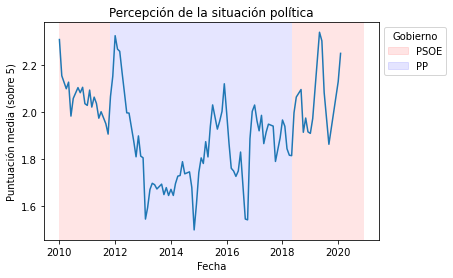

In [643]:
fig, ax = plt.subplots()
plt.plot(medias_sit_politica['Fecha'], medias_sit_politica['C.1.1'])
plt.ylabel('Puntuación media (sobre 5)')
plt.xlabel('Fecha')
plt.title("Percepción de la situación política")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(2010,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP')]
ax.legend(handles=legend_elements,  title = "Gobierno", bbox_to_anchor = (1,1))
plt.savefig("images/Percepcion-politica.png", bbox_inches='tight')
plt.show()


#### Situación política año pasado y siguiente

Siguiendo el mismo criterio que anteriormente, a cada respuesta se le asigna un número para poder agregarlas.

In [644]:
C1213_map = {
    'Mejor':5,
    'Igual':3,
    'Peor':1
}

datos_politicos['C.1.2'] = datos_politicos['C.1.2'].map(C1213_map)
datos_politicos['C.1.3'] = datos_politicos['C.1.3'].map(C1213_map)

In [645]:
medias_sit_politica_pasado = datos_politicos[['Fecha','C.1.2']].groupby(['Fecha']).mean().reset_index()
medias_sit_politica_siguiente = datos_politicos[['Fecha','C.1.3']].groupby(['Fecha']).mean().reset_index()

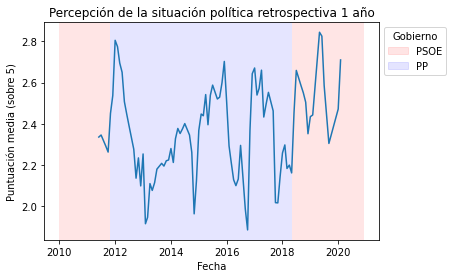

In [646]:
fig, ax = plt.subplots()
plt.plot(medias_sit_politica_pasado['Fecha'], medias_sit_politica_pasado['C.1.2'])
plt.ylabel('Puntuación media (sobre 5)')
plt.xlabel('Fecha')
plt.title("Percepción de la situación política retrospectiva 1 año")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(2010,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP')]
ax.legend(handles=legend_elements,  title = "Gobierno", bbox_to_anchor = (1,1))
plt.savefig("images/Percepcion-politica-retrospectiva.png", bbox_inches='tight')
plt.show()


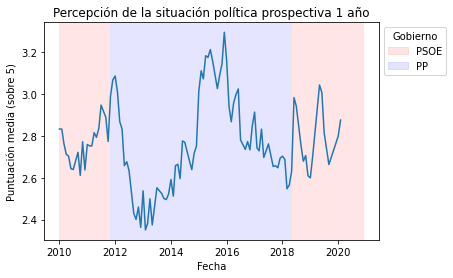

In [647]:
fig, ax = plt.subplots()
plt.plot(medias_sit_politica_siguiente['Fecha'], medias_sit_politica_siguiente['C.1.3'])
plt.ylabel('Puntuación media (sobre 5)')
plt.xlabel('Fecha')
plt.title("Percepción de la situación política prospectiva 1 año")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(2010,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP')]
ax.legend(handles=legend_elements,  title = "Gobierno", bbox_to_anchor = (1,1))
plt.savefig("images/Percepcion-politica-prospectiva.png", bbox_inches='tight')
plt.show()


### Preferencias políticas

Las variables C.2.X representan la opinión de los ciudadanos respecto a distintos temas organizativos territoriales:
* C.2.1 preferencias de organización política estatal
* C.2.2 sentimiento de pertenencia 

Las posibles respuestas sobre la preferencia de organización política son:

In [648]:
print(datos_politicos["C.2.1"].unique())

['Un Estado en el que las Comunidades Autónomas tengan mayor autonomía que en la actualidad'
 'Un Estado con Comunidades Autónomas como en la actualidad'
 'Un Estado con un único Gobierno Central sin autonomías'
 'Un Estado en el que las Comunidades Autónomas tengan menor autonomía que en la actualidad'
 'N.S.'
 'Un Estado en el que se reconociese a las Comunidades Autónomas la posibilidad de convertirse en estados independientes'
 'N.C.' nan]


Las posibles respuestas sobre el sentimiento de pertenencia son:

In [649]:
print(datos_politicos["C.2.2"].unique())

[nan 'Se siente tan español/a como (gentilicio C.A.)'
 'Se siente más (gentilicio C.A.) que español/a'
 'Se siente únicamente español/a'
 'Se siente más español/a que (gentilicio C.A.)'
 '(NO LEER) Ninguna de las anteriores'
 'Se siente únicamente (gentilicio C.A.)' 'N.S.' 'N.C.' '-99.0']


#### Preferencia de organización política

In [650]:
C21_map = {
    'Un Estado con un único Gobierno Central sin autonomías':1,
    'Un Estado en el que las Comunidades Autónomas tengan menor autonomía que en la actualidad':2,
    'Un Estado con Comunidades Autónomas como en la actualidad':3,
    'Un Estado en el que las Comunidades Autónomas tengan mayor autonomía que en la actualidad':4,
    'Un Estado en el que se reconociese a las Comunidades Autónomas la posibilidad de convertirse en estados independientes':5,
}

datos_politicos['C.2.1'] = datos_politicos['C.2.1'].map(C21_map)

Se calcula el porcentaje del total que representa cada una de las respuestas y se muestra una comparación de todos ellos. Pueden no sumar 100% debido a que no se ha tenido en cuenta los NS y NC

In [651]:
count_por_fechas_y_respuesta = datos_politicos[['Fecha','C.2.1']].groupby(['Fecha', 'C.2.1']).size()
count_por_fechas = datos_politicos[['Fecha']].groupby(['Fecha']).size()
porcentajes = (count_por_fechas_y_respuesta.div(count_por_fechas, level = "Fecha") * 100).reset_index(name = "Porcentaje")

In [652]:
porcentajes

,Fecha,C.2.1,Porcentaje
0,2010-01-01,1.0,12.071054
1,2010-01-01,2.0,14.331853
2,2010-01-01,3.0,40.492531
3,2010-01-01,4.0,15.179653
4,2010-01-01,5.0,7.307226
...,...,...,...
390,2020-02-01,1.0,17.822117
391,2020-02-01,2.0,12.174501
392,2020-02-01,3.0,42.340210
393,2020-02-01,4.0,11.362868


Se  generan distintas tablas para cada una de las series obtenidas con los porcentajes de las respuestas. Se representarán a continuación.

In [653]:
porcentajes_central = porcentajes[porcentajes["C.2.1"]==1]
porcentajes_mascentral = porcentajes[porcentajes["C.2.1"]==2]
porcentajes_igual = porcentajes[porcentajes["C.2.1"]==3]
porcentajes_menoscentral = porcentajes[porcentajes["C.2.1"]==4]
porcentajes_federal = porcentajes[porcentajes["C.2.1"]==5]

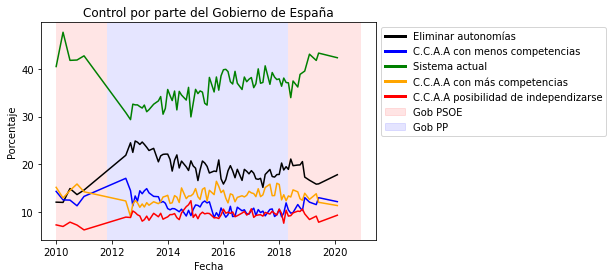

In [654]:
fig, ax = plt.subplots()
plt.plot(porcentajes_central['Fecha'], porcentajes_central['Porcentaje'], color = "black")
plt.plot(porcentajes_mascentral['Fecha'], porcentajes_mascentral['Porcentaje'], color = "b")
plt.plot(porcentajes_igual['Fecha'], porcentajes_igual['Porcentaje'], color = "green")
plt.plot(porcentajes_menoscentral['Fecha'], porcentajes_menoscentral['Porcentaje'], color = "orange")
plt.plot(porcentajes_federal['Fecha'], porcentajes_federal['Porcentaje'], color = "red")


plt.ylabel('Porcentaje')
plt.xlabel('Fecha')
plt.title("Control por parte del Gobierno de España" )

# Los periodos de gobierno
plt.axvspan(datetime.datetime(2010,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Line2D([0], [0], color='black', lw=3, label='Eliminar autonomías'),
                   Line2D([0], [0], color='b', lw=3, label='C.C.A.A con menos competencias'),
                   Line2D([0], [0], color='green', lw=3, label='Sistema actual'),
                   Line2D([0], [0], color='orange', lw=3, label='C.C.A.A con más competencias'),
                   Line2D([0], [0], color='r', lw=3, label='C.C.A.A posibilidad de independizarse'),
                    Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='Gob PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='Gob PP')]
ax.legend(handles=legend_elements, bbox_to_anchor = (1,1))


plt.savefig("images/Control-gobierno-España.png", bbox_inches='tight')
plt.show()


#### Sentimiento de pertenencia

Esta vez para facilitar el tratamiento se sustituye cada una de las respuestas relevantes por un código numérico. En este caso estos códigos no tienen ningún significado ni valor. Simplemente se hace para simplificar la referencia a cada respuesta.

In [655]:
C22_map = {
    'Se siente únicamente español/a':1,
    'Se siente más español/a que (gentilicio C.A.)':2,
    'Se siente tan español/a como (gentilicio C.A.)':3,
    'Se siente más (gentilicio C.A.) que español/a':4,
    'Se siente únicamente (gentilicio C.A.)':5,
}

datos_politicos['C.2.2'] = datos_politicos['C.2.2'].map(C22_map)

Se calcula el porcentaje del total que representa cada una de las respuestas y se muestra una comparación de todos ellos. Pueden no sumar 100% debido a que no se ha tenido en cuenta los NS y NC

In [656]:
count_por_fechas_y_respuesta = datos_politicos[['Fecha','C.2.2']].groupby(['Fecha', 'C.2.2']).size()
count_por_fechas = datos_politicos[['Fecha']].groupby(['Fecha']).size()
porcentajes = (count_por_fechas_y_respuesta.div(count_por_fechas, level = "Fecha") * 100).reset_index(name = "Porcentaje")

In [657]:
porcentajes

,Fecha,C.2.2,Porcentaje
0,2012-11-01,1.0,16.955296
1,2012-11-01,2.0,6.604913
2,2012-11-01,3.0,54.691905
3,2012-11-01,4.0,10.873943
4,2012-11-01,5.0,6.000805
...,...,...,...
360,2020-02-01,1.0,15.623943
361,2020-02-01,2.0,5.579980
362,2020-02-01,3.0,56.543794
363,2020-02-01,4.0,10.754143


Se  generan distintas tablas para cada una de las series obtenidas con los porcentajes de las respuestas. Se representarán a continuación.

In [658]:
porcentajes_espanol = porcentajes[porcentajes["C.2.2"]==1]
porcentajes_masespanolque = porcentajes[porcentajes["C.2.2"]==2]
porcentajes_igualespanolque = porcentajes[porcentajes["C.2.2"]==3]
porcentajes_menosespanolque = porcentajes[porcentajes["C.2.2"]==4]
porcentajes_noespanol = porcentajes[porcentajes["C.2.2"]==5]

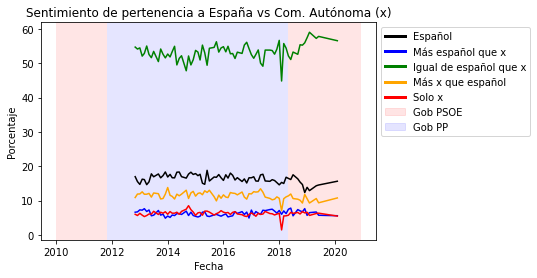

In [676]:
fig, ax = plt.subplots()
plt.plot(porcentajes_espanol['Fecha'], porcentajes_espanol['Porcentaje'], color = "black")
plt.plot(porcentajes_masespanolque['Fecha'], porcentajes_masespanolque['Porcentaje'], color = "b")
plt.plot(porcentajes_igualespanolque['Fecha'], porcentajes_igualespanolque['Porcentaje'], color = "green")
plt.plot(porcentajes_menosespanolque['Fecha'], porcentajes_menosespanolque['Porcentaje'], color = "orange")
plt.plot(porcentajes_noespanol['Fecha'], porcentajes_noespanol['Porcentaje'], color = "red")



plt.ylabel('Porcentaje')
plt.xlabel('Fecha')
plt.title("Sentimiento de pertenencia a España vs Com. Autónoma (x)" )

# Los periodos de gobierno
plt.axvspan(datetime.datetime(2010,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Line2D([0], [0], color='black', lw=3, label='Español'),
                   Line2D([0], [0], color='b', lw=3, label='Más español que x'),
                   Line2D([0], [0], color='green', lw=3, label='Igual de español que x'),
                   Line2D([0], [0], color='orange', lw=3, label='Más x que español'),
                   Line2D([0], [0], color='r', lw=3, label='Solo x'),
                    Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='Gob PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='Gob PP')]
ax.legend(handles=legend_elements, bbox_to_anchor = (1,1))


plt.savefig("images/Sentimiento-pertenencia-España.png", bbox_inches='tight')
plt.show()


### Escala ubicación ideológica

Esta variable indica la colocación del ciudadano en una escala ideológica. Siendo en esta el 1 la posición más a la izquierda y 10 la más a la derecha.

Las posibles respuestas a esta escala son:

In [660]:
print(datos_politicos["C.3.1"].unique())

['3' 'N.S.' 'N.C.' '2' '6' '7' '4' '5' '8' '1 Izquierda' '9' '10 Derecha'
 nan]


#### Evolución general

Simplemente se muestra la media de las respuestas a lo largo del tiempo

In [661]:
C31_map = {
    '1 Izquierda':1,
    '2':2,
    '3':3,
    '4':4,
    '5':5,
    '6':6,
    '7':7,
    '8':8,
    '9':9,
    '10 Derecha':10,
}

datos_politicos['C.3.1'] = datos_politicos['C.3.1'].map(C31_map)

In [662]:
medias_ubic_ideologica = datos_politicos[['Fecha','C.3.1']].groupby(['Fecha']).mean().reset_index()

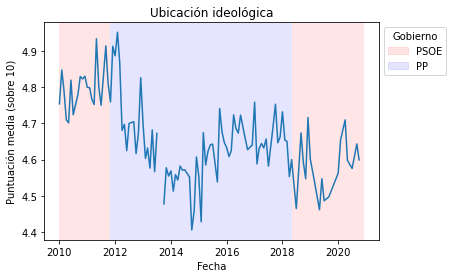

In [663]:
fig, ax = plt.subplots()
plt.plot(medias_ubic_ideologica['Fecha'], medias_ubic_ideologica['C.3.1'])
plt.ylabel('Puntuación media (sobre 10)')
plt.xlabel('Fecha')
plt.title("Ubicación ideológica")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(2010,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP')]
ax.legend(handles=legend_elements,  title = "Gobierno", bbox_to_anchor = (1,1))
plt.savefig("images/Ubicación-ideológica.png", bbox_inches='tight')
plt.show()

#### Tendencia a los extremos

Se comparará la evolución del porcentaje de personas que se identifican con posiciones más extremas

In [664]:
count_por_fechas_y_respuesta = datos_politicos[['Fecha','C.3.1']].groupby(['Fecha', 'C.3.1']).size()
count_por_fechas = datos_politicos[['Fecha']].groupby(['Fecha']).size()
porcentajes = (count_por_fechas_y_respuesta.div(count_por_fechas, level = "Fecha") * 100).reset_index(name = "Porcentaje")

In [665]:
porcentajes

,Fecha,C.3.1,Porcentaje
0,2010-01-01,1.0,3.068228
1,2010-01-01,2.0,4.440856
2,2010-01-01,3.0,13.645539
3,2010-01-01,4.0,15.220024
4,2010-01-01,5.0,21.921679
...,...,...,...
1105,2020-10-01,6.0,9.781122
1106,2020-10-01,7.0,6.566347
1107,2020-10-01,8.0,3.659371
1108,2020-10-01,9.0,1.128591


In [666]:
#porcentajes_extr_izq = porcentajes[porcentajes["C.3.1"]<2.5]  # 1 o 2
#porcentajes_izq = porcentajes[(porcentajes["C.3.1"]>2.5) & (porcentajes["C.3.1"]<4.5)] # 3 o 4
#porcentajes_centro = porcentajes[(porcentajes["C.3.1"]>4.5) & (porcentajes["C.3.1"]<6.5)] # 5 o 6
#porcentajes_dcha = porcentajes[(porcentajes["C.3.1"]>6.5) &  (porcentajes["C.3.1"]<8.5)] # 7 u 8
#porcentajes_extr_dcha = porcentajes[porcentajes["C.3.1"]> 8.5] # 9 u 10

In [667]:
porcentajes_extr_izq = porcentajes[porcentajes["C.3.1"]<2.5]  # 1 o 2
porcentajes_3 = porcentajes[porcentajes["C.3.1"]==3] 
porcentajes_4 = porcentajes[porcentajes["C.3.1"]==4] 
porcentajes_5 = porcentajes[porcentajes["C.3.1"]==5] 
porcentajes_6 = porcentajes[porcentajes["C.3.1"]==6] 
porcentajes_7 = porcentajes[porcentajes["C.3.1"]==7] 
porcentajes_8 = porcentajes[porcentajes["C.3.1"]==8] 
porcentajes_extr_dcha = porcentajes[porcentajes["C.3.1"]> 8.5] # 9 u 10

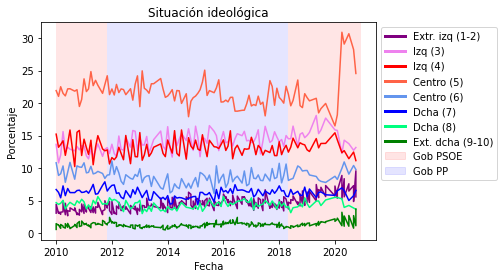

In [668]:
fig, ax = plt.subplots()
plt.plot(porcentajes_extr_izq['Fecha'], porcentajes_extr_izq['Porcentaje'], color = "purple")
plt.plot(porcentajes_3['Fecha'], porcentajes_3['Porcentaje'], color = "violet")
plt.plot(porcentajes_4['Fecha'], porcentajes_4['Porcentaje'], color = "red")
plt.plot(porcentajes_5['Fecha'], porcentajes_5['Porcentaje'], color = "tomato")
plt.plot(porcentajes_6['Fecha'], porcentajes_6['Porcentaje'], color = "cornflowerblue")
plt.plot(porcentajes_7['Fecha'], porcentajes_7['Porcentaje'], color = "blue")
plt.plot(porcentajes_8['Fecha'], porcentajes_8['Porcentaje'], color = "springgreen")
plt.plot(porcentajes_extr_dcha['Fecha'], porcentajes_extr_dcha['Porcentaje'], color = "green")



plt.ylabel('Porcentaje')
plt.xlabel('Fecha')
plt.title("Situación ideológica" )

# Los periodos de gobierno
plt.axvspan(datetime.datetime(2010,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Line2D([0], [0], color='purple', lw=3, label='Extr. izq (1-2)'),
                   Line2D([0], [0], color='violet', lw=3, label='Izq (3)'),
                   Line2D([0], [0], color='red', lw=3, label='Izq (4)'),
                   Line2D([0], [0], color='tomato', lw=3, label='Centro (5)'),
                   Line2D([0], [0], color='cornflowerblue', lw=3, label='Centro (6)'),
                   Line2D([0], [0], color='blue', lw=3, label='Dcha (7)'),
                   Line2D([0], [0], color='springgreen', lw=3, label='Dcha (8)'),
                   Line2D([0], [0], color='green', lw=3, label='Ext. dcha (9-10)'),
                    Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='Gob PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='Gob PP')]
ax.legend(handles=legend_elements, bbox_to_anchor = (1,1))


plt.savefig("images/Ubicacion-ideologica-label.png", bbox_inches='tight')
plt.show()


In [669]:
porcentajes_extr_izq = porcentajes[porcentajes["C.3.1"]<3.5]  
porcentajes_centro = porcentajes[(porcentajes["C.3.1"]>3.5) & (porcentajes["C.3.1"]<6.5)]
porcentajes_extr_dcha = porcentajes[porcentajes["C.3.1"]> 6.5] 

In [670]:
#porcentajes_extr_izq = porcentajes[porcentajes["C.3.1"]<2.5]  # 1 o 2
#porcentajes_izq = porcentajes[(porcentajes["C.3.1"]>2.5) & (porcentajes["C.3.1"]<4.5)] # 3 o 4
#porcentajes_centro = porcentajes[(porcentajes["C.3.1"]>4.5) & (porcentajes["C.3.1"]<6.5)] # 5 o 6
#porcentajes_dcha = porcentajes[(porcentajes["C.3.1"]>6.5) &  (porcentajes["C.3.1"]<8.5)] # 7 u 8
#porcentajes_extr_dcha = porcentajes[porcentajes["C.3.1"]> 8.5] # 9 u 10

### Valoración gobierno/oposición

Las variables C.3.X representan la opinión de los ciudadanos respecto a la situación política:
* C.3.3 valoración gestión gobierno
* C.3.4 valoración gestión oposición


Las posibles respuestas sobre valoración de gestión del gobierno y oposición son:

In [671]:
print(datos_politicos["C.3.3"].unique())

['Regular' 'Muy mala' 'Mala' 'N.S.' 'Buena' 'Muy buena' 'N.C.' nan]


In [672]:
C3334_map = {
    'Muy buena':5,
    'Buena':4,
    'Regular':3,
    'Mala':2,
    'Muy mala':1,
}

datos_politicos['C.3.3'] = datos_politicos['C.3.3'].map(C3334_map)
datos_politicos['C.3.4'] = datos_politicos['C.3.4'].map(C3334_map)

In [673]:
datos_politicos_copia = datos_politicos[(datos_politicos['C.3.3'].notna()) & (datos_politicos['C.3.4'].notna())]

In [674]:
medias_gestion_gobierno = datos_politicos_copia[['Fecha','C.3.3']].groupby(['Fecha']).mean().reset_index()
medias_gestion_oposicion = datos_politicos_copia[['Fecha','C.3.4']].groupby(['Fecha']).mean().reset_index()

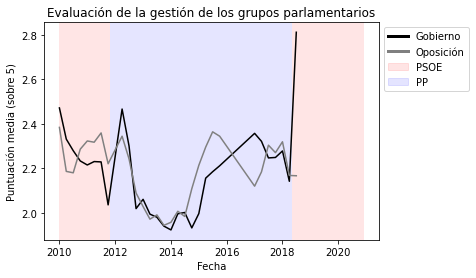

In [675]:
fig, ax = plt.subplots()
plt.plot(medias_gestion_gobierno['Fecha'], medias_gestion_gobierno['C.3.3'], color = "black")
plt.plot(medias_gestion_oposicion['Fecha'], medias_gestion_oposicion['C.3.4'], color = "grey")
plt.ylabel('Puntuación media (sobre 5)')
plt.xlabel('Fecha')
plt.title("Evaluación de la gestión de los grupos parlamentarios")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(2010,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [ Line2D([0], [0], color='black', lw=3, label='Gobierno'),
                   Line2D([0], [0], color='grey', lw=3, label='Oposición'),
                    Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP')]
ax.legend(handles=legend_elements, bbox_to_anchor = (1,1))
plt.savefig("images/Evaluación-gestion-parlamentaria.png", bbox_inches='tight')
plt.show()


(No hay datos desde que el PSOE accede al Gobierno en 2018)

## Estudio de la percepción económica

## Estudio de factores polarizadores adicionales